In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import svm

In [2]:
# A. Load Data
dataset = pd.read_csv("data_banknote_authentication.csv")
npdataset = dataset.to_numpy()

In [3]:
X = np.transpose(npdataset[:, 0:4])
Y = npdataset[:, 4]

X_train = X[:, 0:1098]
Y_train = Y[0:1098]

X_test = X[:, 1098:]
Y_test = Y[1098: ]

In [4]:
# B. Perceptron Algorithm

def loss(W, X, Y):
    
    loss = 0
    for i in range(len(Y)):
        if (Y[i] * np.transpose(W) @ X[:, i] < 0):
            loss = loss + 1      
    return loss/len(Y)
    
    
def  add_one(X):
    
    # Adding one dimension with constant 1 to each data point:
    one = np.ones(shape = np.shape(X)[1])
    X = np.vstack((one, X))
    return X

def perceptron(X_tr, Y_tr, X_te, Y_te, max_iter):
    
    w = 0
    loss_history = list()
    
    for t in range(max_iter):
        if (t == 0):
            w = Y_tr[0] * X_tr[:, 0]
        else:
            for i in range(len(Y_tr)):
                if (Y_tr[i] * np.transpose(w) @ X_tr[:, i] < 0):
                    w = w + Y_tr[i] * X_tr[:, i]
                    #print(w)
                    break
                    
            if (t % 500 == 0):
                #print(loss_history)
                loss_history.append(loss(w, X_te, Y_te))
    
    return w, loss_history

def psi_func(X):
    
    X = np.vstack((X, X[4, :] ** 3))
    
    return X
    


In [5]:
X_train_modified = add_one(X_train)
X_test_modified = add_one(X_test)

In [6]:
w, loss_history = perceptron(X_train_modified, Y_train, X_test_modified, Y_test, max_iter = 50000)

Text(0, 0.5, 'Error on the test data')

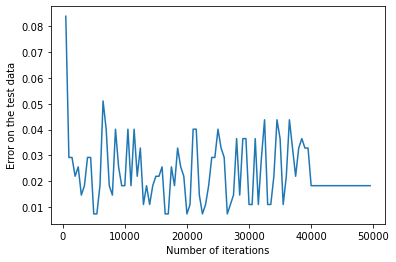

In [7]:
plt.plot((np.arange(99) + 1) * 500, loss_history)
plt.xlabel("Number of iterations")
plt.ylabel("Error on the test data")

In [8]:
print("final weights = ", w)
print("final loss = ", loss_history[98])

final weights =  [ 475.         201.50565   -109.4033456   39.19858   1339.065463 ]
final loss =  0.01824817518248175


In [9]:
# C. Generalize to non-linear classification
psi_train = psi_func(X_train_modified)
psi_test = psi_func(X_test_modified)

In [10]:
non_linear_w, non_linear_loss_history = perceptron(psi_train, Y_train, psi_test, Y_test, max_iter = 50000)

Text(0, 0.5, 'Error on the test data for non-linear classification')

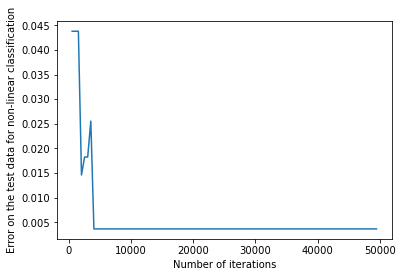

In [11]:
plt.plot((np.arange(99) + 1) * 500, non_linear_loss_history)
plt.xlabel("Number of iterations")
plt.ylabel("Error on the test data for non-linear classification")

In [12]:
print("final weights for non-linear classification = ", non_linear_w)
print("final loss for non-linear classification = ", non_linear_loss_history[98])

final weights for non-linear classification =  [124.          70.00977    -40.2268496   10.69197    318.63396
  64.32316951]
final loss for non-linear classification =  0.0036496350364963502


In [20]:
# D. SVM Algorithm

clf = svm.SVC(kernel = 'linear', C=1)
clf.fit(np.transpose(X_train), Y_train)
Y_test_SVM = clf.predict(np.transpose(X_test))
Y_train_SVM = clf.predict(np.transpose(X_train))
def loss(Y, Y_predict):
    loss = 0
    for i in range(len(Y)):
        if (Y[i] != Y_predict[i]):
            loss = loss + 1      
    return loss/len(Y)

EmpiricalRisk_SVM = loss(Y_train, Y_train_SVM)
print("Final error on the training samples (empirical risk) :", EmpiricalRisk_SVM)

TrueRisk_SVM = loss(Y_test, Y_test_SVM)
print("Final error on the test samples (true risk) :", TrueRisk_SVM)

print("Final weights:")
print('w = ',clf.coef_)
print('b = ',clf.intercept_)

Final error on the training samples (empirical risk) : 0.0036429872495446266
Final error on the test samples (true risk) : 0.01824817518248175
Final weights:
w =  [[ 1.08820876 -0.52311841  0.21277062  5.96180963]]
b =  [1.94610694]
